# Churn Prediction
## About This File
The data set belongs to a leading online E-Commerce company. An online retail (E commerce) company wants to know the customers who are going to churn, so accordingly they can approach customer to offer some promos.
<br/> source: https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

## Index
1) Data Understanding
2) Exploratory Data Analysis
3) Data Preprocessing
4) Model Building

## Data Understanding

### Import Library

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [4]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
df.sample(5)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
671        50672      1     0.0                Phone         1   
12         50013      1     0.0                Phone         1   
3105       53106      1     1.0             Computer         3   
2518       52519      0     9.0         Mobile Phone         1   
4029       54030      1     1.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
671              10.0                  COD    Male             2.0   
12               11.0                  COD    Male             2.0   
3105             13.0             E wallet  Female             3.0   
2518             11.0           Debit Card  Female             2.0   
4029             14.0           Debit Card    Male             4.0   

      NumberOfDeviceRegistered PreferedOrderCat  SatisfactionScore  \
671                          3     Mobile Phone                  2   
12                           3           Mobile                  3   
3105                         6     Mobile Phone                  3   
2518                         3          Fashion                  5   
4029                         4     Mobile Phone                  4   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
671       Divorced                2         1                         15.0   
12          Single                2         1                         13.0   
3105       Married                2         0                         17.0   
2518       Married                5         0                         12.0   
4029        Single                3         1                         24.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
671          5.0         5.0                6.0          136.91  
12           2.0         2.0                2.0          134.41  
3105         2.0         2.0                1.0          148.51  
2518         1.0         1.0                2.0          180.08  
4029         2.0         2.0                1.0          149.72

### Understanding Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [7]:
df.drop('CustomerID', axis = 1, inplace = True)   # drop the customerID column as it's no use

In [8]:
df.describe()

Churn       Tenure     CityTier  WarehouseToHome  HourSpendOnApp  \
count  5630.000000  5366.000000  5630.000000      5379.000000     5375.000000   
mean      0.168384    10.189899     1.654707        15.639896        2.931535   
std       0.374240     8.557241     0.915389         8.531475        0.721926   
min       0.000000     0.000000     1.000000         5.000000        0.000000   
25%       0.000000     2.000000     1.000000         9.000000        2.000000   
50%       0.000000     9.000000     1.000000        14.000000        3.000000   
75%       0.000000    16.000000     3.000000        20.000000        3.000000   
max       1.000000    61.000000     3.000000       127.000000        5.000000   

       NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  \
count               5630.000000        5630.000000      5630.000000   
mean                   3.688988           3.066785         4.214032   
std                    1.023999           1.380194         2.583586   
min                    1.000000           1.000000         1.000000   
25%                    3.000000           2.000000         2.000000   
50%                    4.000000           3.000000         3.000000   
75%                    4.000000           4.000000         6.000000   
max                    6.000000           5.000000        22.000000   

          Complain  OrderAmountHikeFromlastYear   CouponUsed   OrderCount  \
count  5630.000000                  5365.000000  5374.000000  5372.000000   
mean      0.284902                    15.707922     1.751023     3.008004   
std       0.451408                     3.675485     1.894621     2.939680   
min       0.000000                    11.000000     0.000000     1.000000   
25%       0.000000                    13.000000     1.000000     1.000000   
50%       0.000000                    15.000000     1.000000     2.000000   
75%       1.000000                    18.000000     2.000000     3.000000   
max       1.000000                    26.000000    16.000000    16.000000   

       DaySinceLastOrder  CashbackAmount  
count        5323.000000     5630.000000  
mean            4.543491      177.223030  
std             3.654433       49.207036  
min             0.000000        0.000000  
25%             2.000000      145.770000  
50%             3.000000      163.280000  
75%             7.000000      196.392500  
max            46.000000      324.990000

In [16]:
sum_missing = df.isna().sum()
percent_missing = round(df.isnull().sum()*100 / len(df),2)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'sum_missing': sum_missing,
                                 'percent_missing': percent_missing}).sort_values(by = 'percent_missing', 
                                                                                  ascending = False).reset_index(drop=True)
missing_value_df
print(f'The number of missing values: {df.isnull().sum().sum()}')
print(f'The number of rows with missing values: {df[df.isna().any(axis=1)].shape[0]}')
print(f'Percentage rows with missing values: {(df[df.isna().any(axis=1)].shape[0])/df.shape[0]}')

The number of missing values: 1856
The number of rows with missing values: 1856
Percentage rows with missing values: 0.32966252220248665


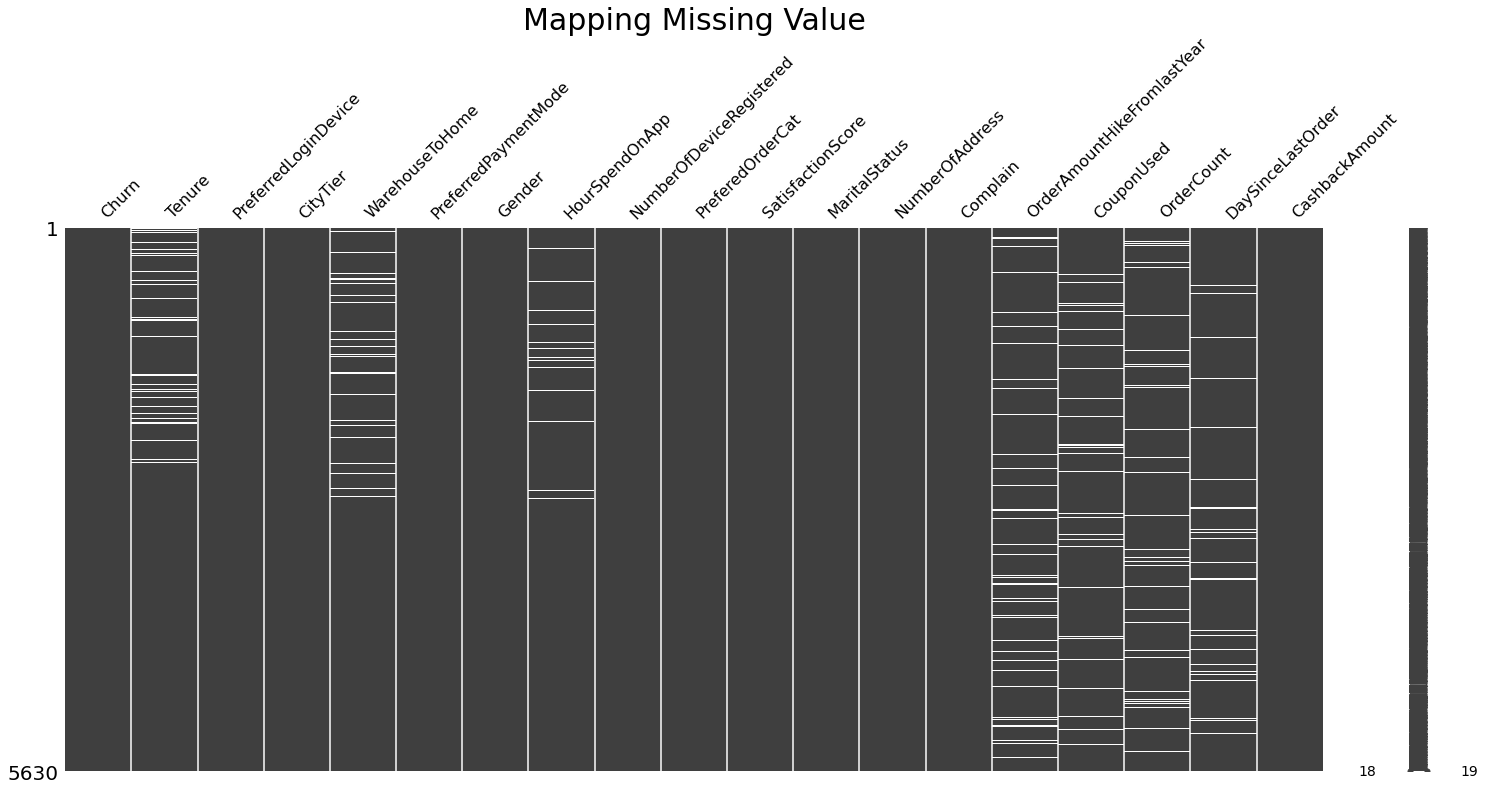

In [17]:
#Visualize missingness,
import missingno as msno
msno.matrix(df)
plt.title('Mapping Missing Value', fontsize= 30)
plt.show()

## Exploratory Data Analysis

In [19]:
df2 = df.copy()

In [27]:
#pengelompokan
cats =  ['Churn', 'PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
nums =  ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 
        'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 
        'CashbackAmount']

### Univariate Analysis

In [28]:
df2[nums].describe().T

count        mean        std   min     25%  \
Tenure                       5366.0   10.189899   8.557241   0.0    2.00   
WarehouseToHome              5379.0   15.639896   8.531475   5.0    9.00   
HourSpendOnApp               5375.0    2.931535   0.721926   0.0    2.00   
NumberOfDeviceRegistered     5630.0    3.688988   1.023999   1.0    3.00   
SatisfactionScore            5630.0    3.066785   1.380194   1.0    2.00   
NumberOfAddress              5630.0    4.214032   2.583586   1.0    2.00   
Complain                     5630.0    0.284902   0.451408   0.0    0.00   
OrderAmountHikeFromlastYear  5365.0   15.707922   3.675485  11.0   13.00   
CouponUsed                   5374.0    1.751023   1.894621   0.0    1.00   
OrderCount                   5372.0    3.008004   2.939680   1.0    1.00   
DaySinceLastOrder            5323.0    4.543491   3.654433   0.0    2.00   
CashbackAmount               5630.0  177.223030  49.207036   0.0  145.77   

                                50%       75%     max  
Tenure                         9.00   16.0000   61.00  
WarehouseToHome               14.00   20.0000  127.00  
HourSpendOnApp                 3.00    3.0000    5.00  
NumberOfDeviceRegistered       4.00    4.0000    6.00  
SatisfactionScore              3.00    4.0000    5.00  
NumberOfAddress                3.00    6.0000   22.00  
Complain                       0.00    1.0000    1.00  
OrderAmountHikeFromlastYear   15.00   18.0000   26.00  
CouponUsed                     1.00    2.0000   16.00  
OrderCount                     2.00    3.0000   16.00  
DaySinceLastOrder              3.00    7.0000   46.00  
CashbackAmount               163.28  196.3925  324.99

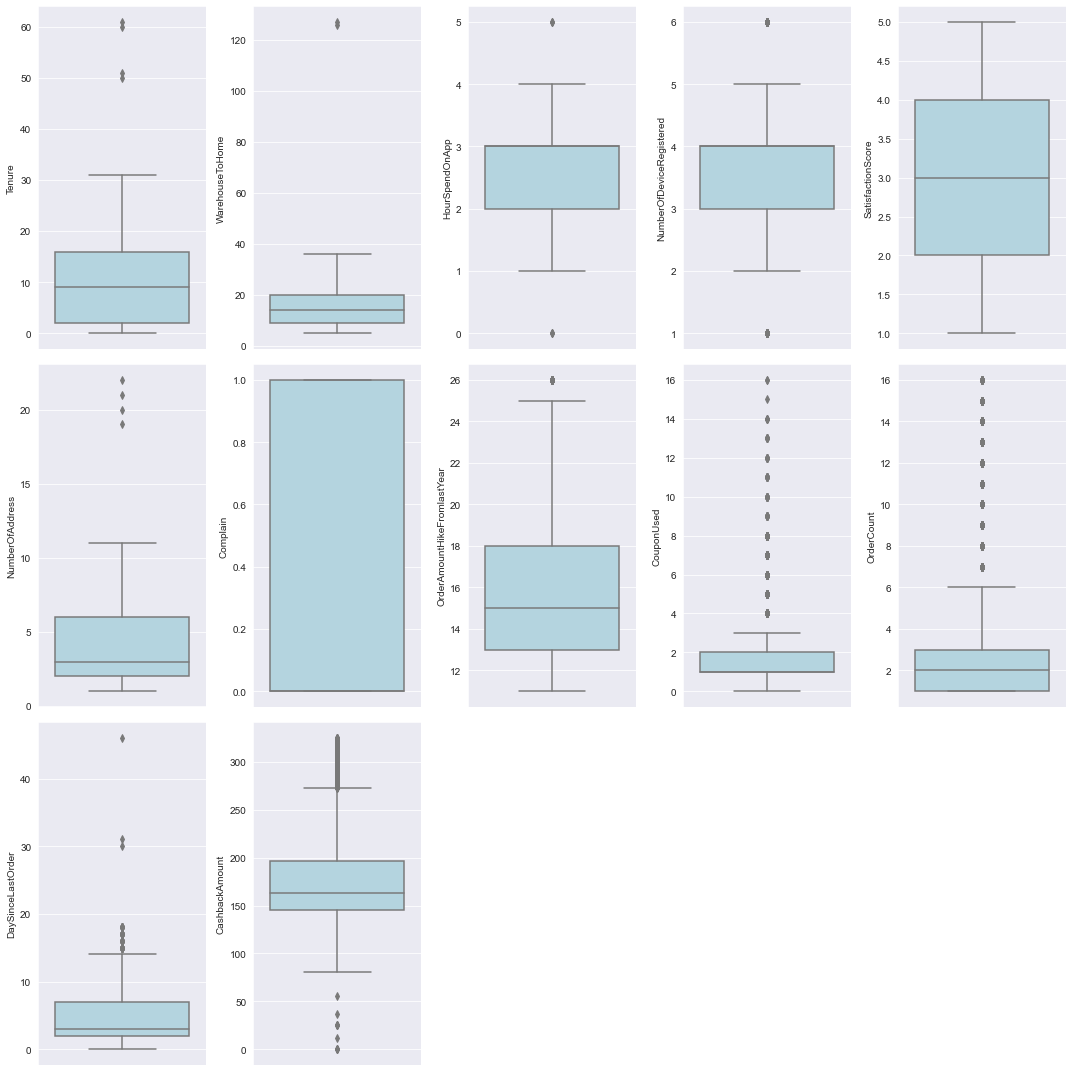

In [37]:
plt.figure(figsize=(15,15))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df2[nums[i]], color='lightblue', orient='v')
    plt.tight_layout()

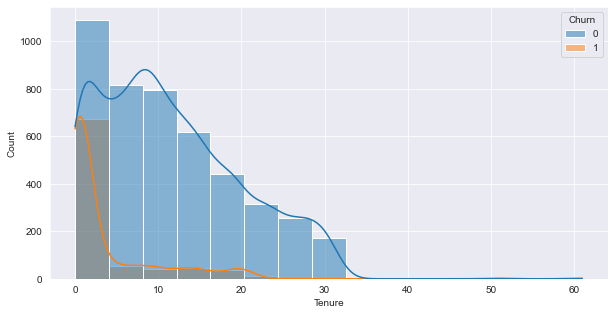

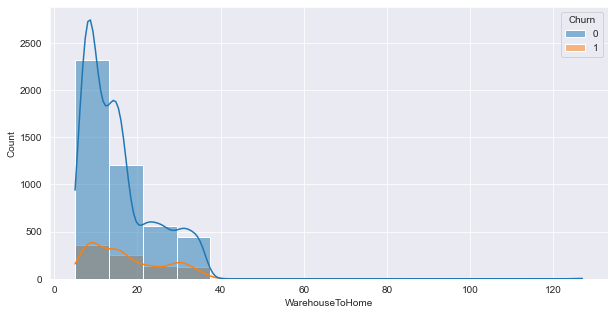

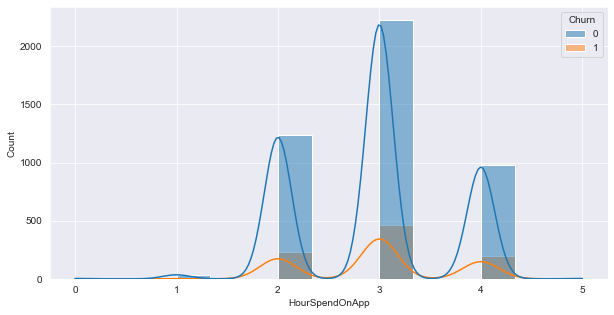

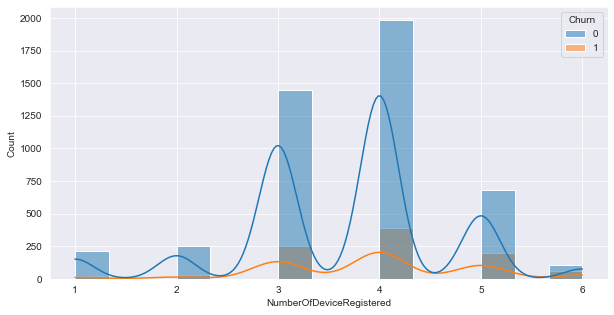

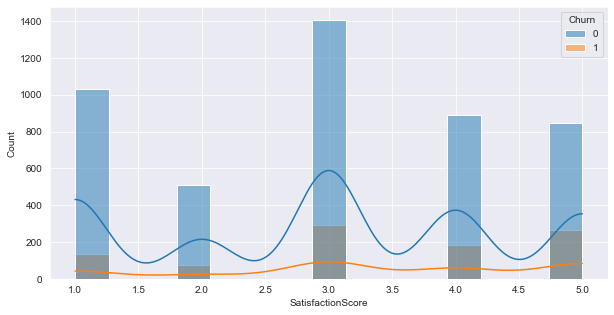

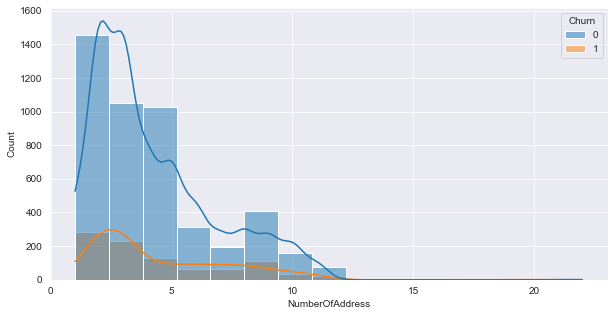

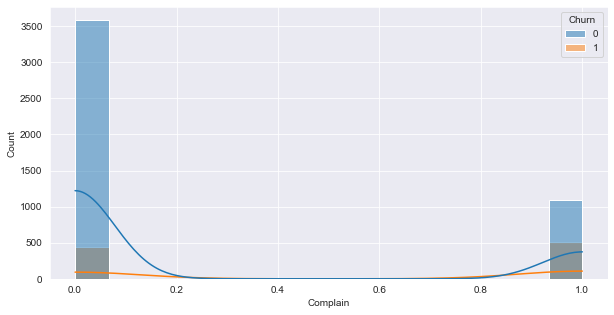

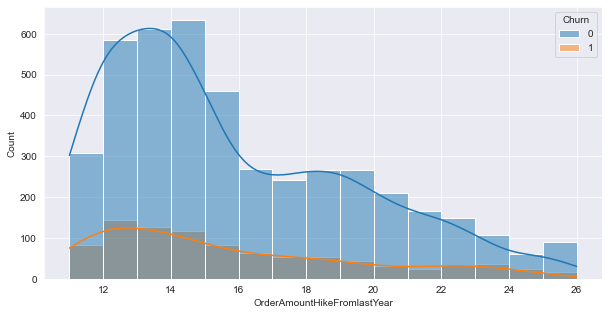

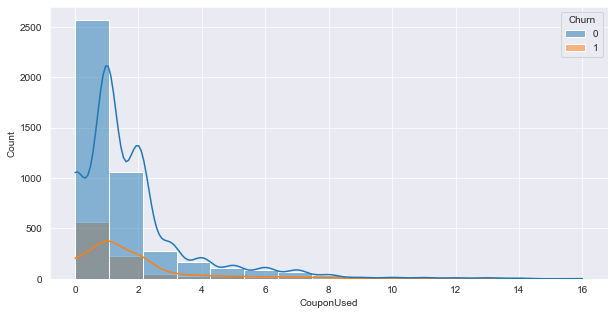

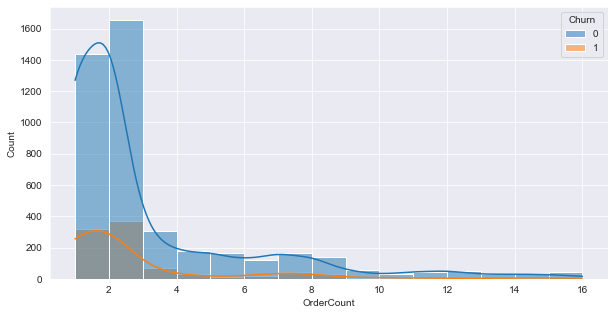

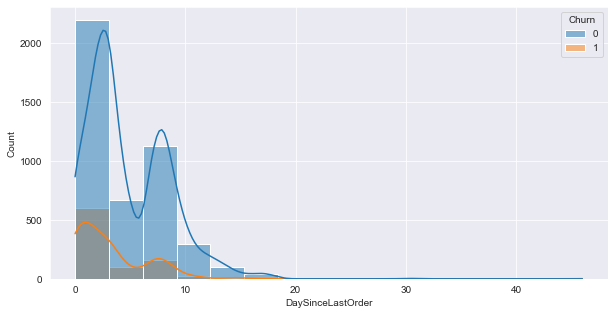

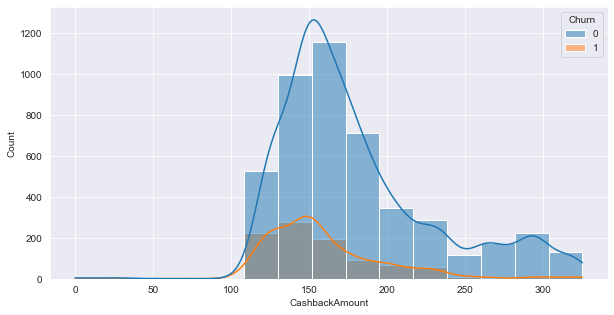

In [38]:
for i in nums:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df2, x=i, kde= True, bins= 15, hue='Churn')
    plt.show()

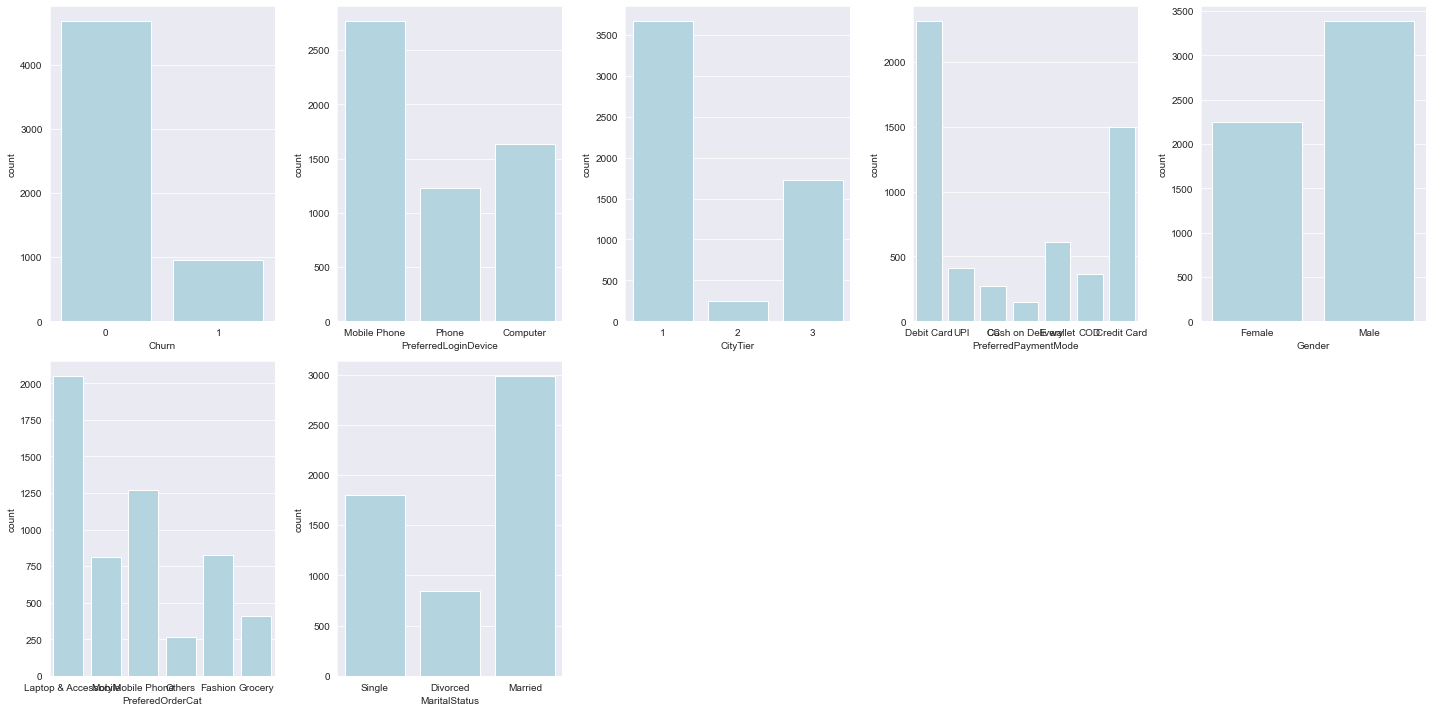

In [39]:
plt.figure(figsize=(20,10))
for i in range(0, len(cats)):
    plt.subplot(2, 5, i+1)
    sns.countplot(df2[cats[i]], color='lightblue', orient='h')
    plt.tight_layout()

In [40]:
df2['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

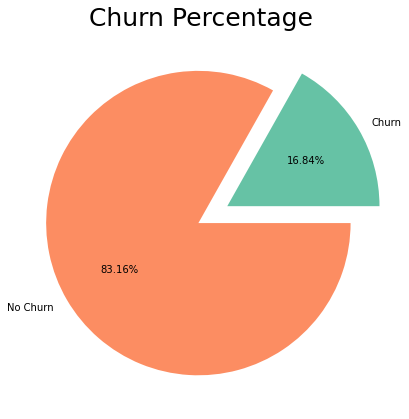

In [34]:
plt.figure(figsize=(7,7))
data = [948, 4682]
explode = [0.2,0.02]
labels = ['Churn', 'No Churn']
colors = sns.color_palette('Set2')
plt.pie(data, labels=labels,colors = colors, autopct = '%0.2f%%', explode = explode)
plt.title('Churn Percentage',fontsize= 25)
plt.show()

For 0 label it contain 4682 value and for 1 label it contain 948 value, which is the case of imbalance data on moderate level

### Bivariate Analysis

Text(0.5, 1.0, 'Correlation Heatmap')

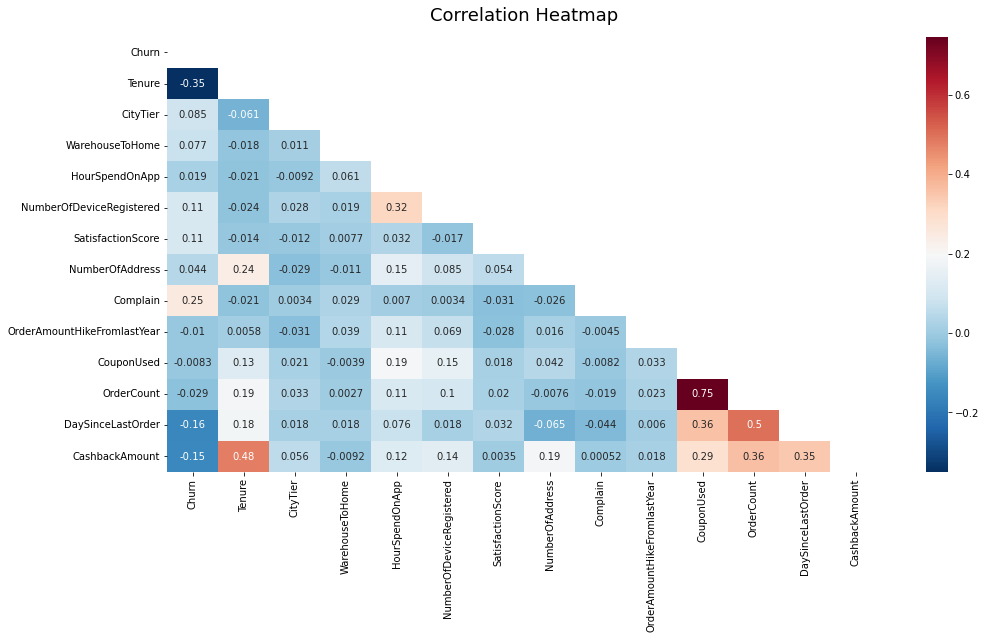

In [35]:
plt.figure(figsize=(16, 8))

mask = np.triu(np.ones_like(df2.corr(), dtype=np.bool))

heatmap = sns.heatmap(df2.corr(), mask=mask, annot=True, cmap='RdBu_r' )
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

### Descriptive Analysis

In [41]:
df3 = df2.copy()
df3.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
df3.loc[df['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'
df3.loc[df['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'
df3.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

#### Most Prefered Login Device

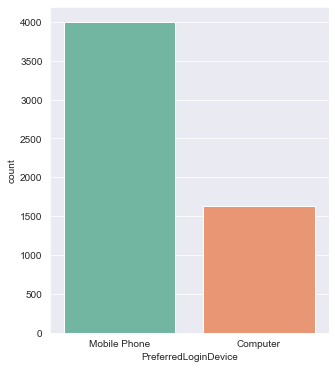

In [42]:
plt.figure(figsize = (5,6))
sns.set_style('darkgrid')
sns.countplot(x  = 'PreferredLoginDevice',  data = df3, palette = 'Set2');

#### Most Preferes Payment Method

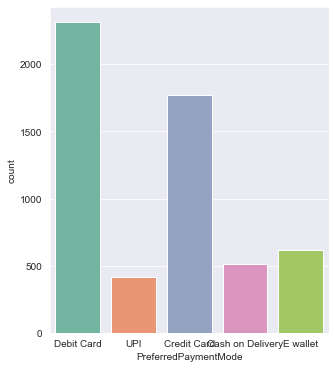

In [43]:
plt.figure(figsize = (5,6))
sns.set_style('darkgrid')
sns.countplot(x  = 'PreferredPaymentMode',  data = df3, palette = 'Set2');

#### Most Ordered Category

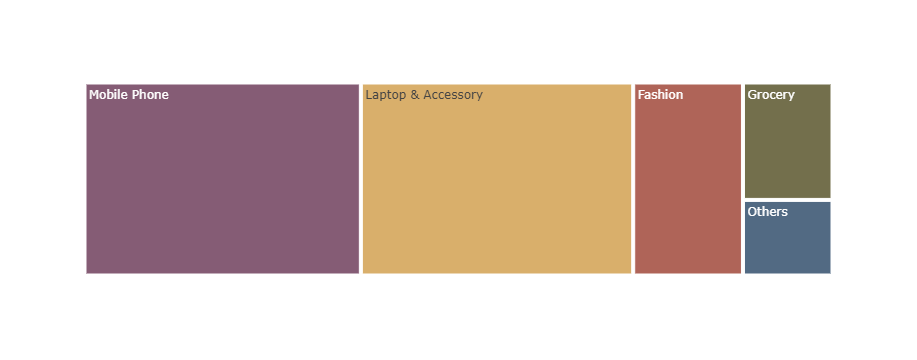

In [46]:
df3_ord  =df3['PreferedOrderCat'].value_counts().reset_index()
df3_ord.columns = ['mode', 'count']
df3_ord

import plotly.express as px
fig = px.treemap(df3_ord, path = ['mode'],
                 values = 'count', 
                 color_discrete_sequence=px.colors.qualitative.Antique)
fig.show()

## Data Preprocessing

In [51]:
df4 = df3.copy()

### Handling Missing Values

#### Identify Missing Values

In [54]:
sum_missing = df4.isna().sum()
percent_missing = round(df.isnull().sum()*100 / len(df),2)
missing_value_df4 = pd.DataFrame({'column_name': df4.columns,
                                 'sum_missing': sum_missing,
                                 'percent_missing': percent_missing}).sort_values(by = 'percent_missing', 
                                                                                  ascending = False).reset_index(drop=True)
missing_value_df4

column_name  sum_missing  percent_missing
0             DaySinceLastOrder          307             5.45
1   OrderAmountHikeFromlastYear          265             4.71
2                        Tenure          264             4.69
3                    OrderCount          258             4.58
4                    CouponUsed          256             4.55
5                HourSpendOnApp          255             4.53
6               WarehouseToHome          251             4.46
7                         Churn            0             0.00
8                 MaritalStatus            0             0.00
9                      Complain            0             0.00
10              NumberOfAddress            0             0.00
11             PreferedOrderCat            0             0.00
12            SatisfactionScore            0             0.00
13     NumberOfDeviceRegistered            0             0.00
14                       Gender            0             0.00
15         PreferredPaymentMode            0             0.00
16                     CityTier            0             0.00
17         PreferredLoginDevice            0             0.00
18               CashbackAmount            0             0.00

In [55]:
print(f'The number of missing values: {df4.isnull().sum().sum()}')
print(f'The number of rows with missing values: {df4[df.isna().any(axis=1)].shape[0]}')
print(f'Percentage rows with missing values: {(df4[df.isna().any(axis=1)].shape[0])/df4.shape[0]}')

The number of missing values: 1856
The number of rows with missing values: 1856
Percentage rows with missing values: 0.32966252220248665


In total there are **1,856 missing values**, and there are also **1,856 rows with missing values**, meaning that **each missing value is in a different row**, and no row has more than one missing value.
<br>
So if we drop all rows with missing values, we will discard 1856 rows or 32.97 percents of the dataset and will cause data loss, so the most appropriate treatment is **imputation**.

In [56]:
df5 = df4.copy()

#### Impute Missing Values

In [58]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy= 'median')      
imputer.fit(df5[nums])
df5[nums] = imputer.transform(df5[nums])

In [59]:
df5.isna().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

### Handling Outliers

#### Identify Outliers

In [61]:
df6 = df5.copy()

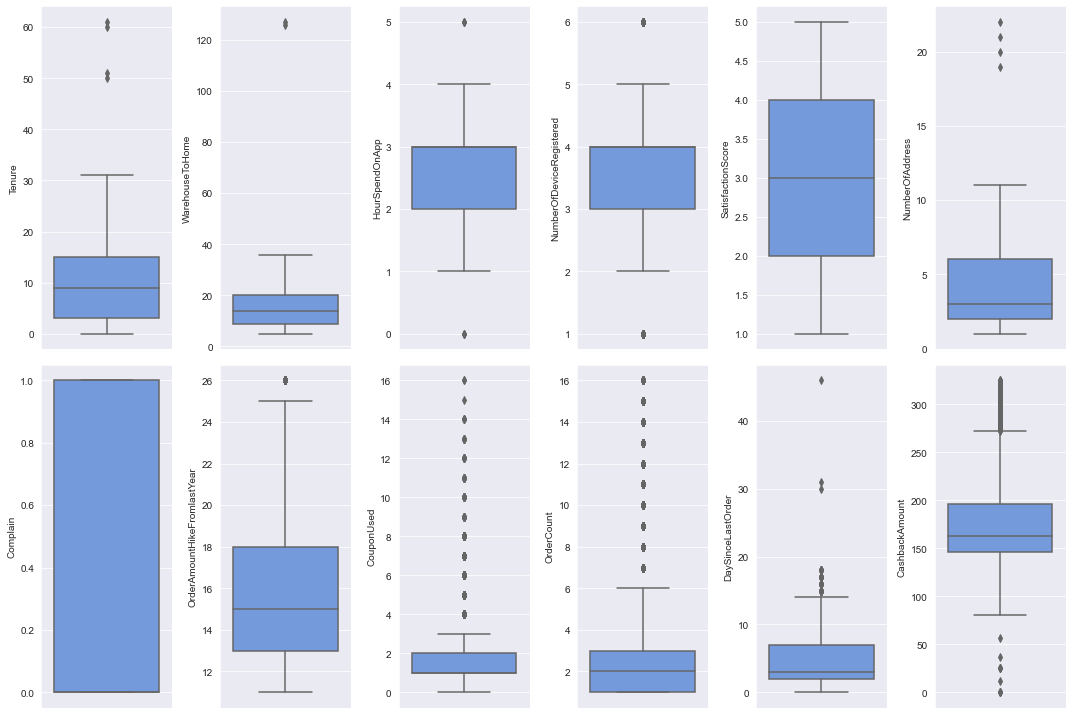

In [62]:
plt.figure(figsize=(15,20))
for i in range(0, len(nums)):
    plt.subplot(4, 6, i+1)
    sns.set_style('darkgrid')
    sns.boxplot(y=df6[nums[i]], color='cornflowerblue', orient='v')
    plt.tight_layout()

#### Removing Outliers with Z-Score

In [63]:
df7 = df6.copy()

In [65]:
from scipy import stats

In [66]:
print(f'Total Rows before removing outilers: {len(df7)}')
filtered_entries = np.array([True] * len(df7))
for col in nums:
    zscore = abs(stats.zscore(df7[col]))
    filtered_entries = (zscore < 3) & filtered_entries
df7 = df7[filtered_entries]
print(f'Total Rows after removing outilers: {len(df7)}')

Total Rows before removing outilers: 5630
Total Rows after removing outilers: 5350


### Feature Encoding

#### Analysis
In the dataset, there are 5 features of categorical type, namely:
   - PreferredLoginDevice (nominal - 2 unique values)
   - PreferredPaymentMode (nominal - 5 unique values)
   - Gender (nominal - 2 unique values)
   - PreferedOrderCat (nominal - 5 unique values)
   - Marital Status (nominal - 3 unique values)
 
For those that are nominal and only have 2 unique values, label encoding will be carried out
   - Gender : 1= Male; 0=Female
   - Preferred Login Device : 1= Mobile; 0=Computer
 
For those that are nominal and have more than 2 unique values, one hot encoding will be performed:
   - Preferred Payment Mode
   - PreferredOrderCat
   - Marital status

#### Label Encoding and One-Hot Encoding

In [67]:
df8 = df7.copy()

In [68]:
label=['Gender','PreferredLoginDevice']
hot=['PreferredPaymentMode','PreferedOrderCat','MaritalStatus']

# label encoder
for cat in label:
    df8[cat] = df8[cat].astype('category').cat.codes
    
# one hot encoding
for cat in hot:
    onehots = pd.get_dummies(df8[cat], prefix=cat)
    df8 = df8.join(onehots)

df8 = df8.drop(columns=hot).copy()

In [69]:
df8.sample(5)

Churn  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  Gender  \
1464      0    16.0                     0         3             32.0       1   
2050      0    12.0                     1         3              8.0       1   
1684      0     0.0                     1         3             14.0       0   
1469      1     0.0                     1         3             12.0       1   
4865      0    13.0                     1         3              9.0       1   

      HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
1464             3.0                       3.0                1.0   
2050             2.0                       1.0                3.0   
1684             2.0                       3.0                4.0   
1469             3.0                       5.0                3.0   
4865             3.0                       2.0                3.0   

      NumberOfAddress  ...  PreferredPaymentMode_E wallet  \
1464              2.0  ...                              0   
2050              1.0  ...                              0   
1684              2.0  ...                              1   
1469              5.0  ...                              0   
4865              2.0  ...                              0   

      PreferredPaymentMode_UPI  PreferedOrderCat_Fashion  \
1464                         0                         0   
2050                         0                         1   
1684                         0                         0   
1469                         0                         0   
4865                         0                         1   

      PreferedOrderCat_Grocery  PreferedOrderCat_Laptop & Accessory  \
1464                         1                                    0   
2050                         0                                    0   
1684                         0                                    1   
1469                         0                                    1   
4865                         0                                    0   

      PreferedOrderCat_Mobile Phone  PreferedOrderCat_Others  \
1464                              0                        0   
2050                              0                        0   
1684                              0                        0   
1469                              0                        0   
4865                              0                        0   

      MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  
1464                       0                      1                     0  
2050                       0                      0                     1  
1684                       0                      1                     0  
1469                       0                      1                     0  
4865                       0                      0                     1  

[5 rows x 29 columns]

### Data Transformation

#### Scaling numerical feature

In [71]:
df9 = df8.copy()
df9_1 = df9.copy()

In [72]:
from sklearn.preprocessing import MinMaxScaler
for i in nums:
    df9[i] = MinMaxScaler().fit_transform(df9_1[i].values.reshape(len(df9_1), 1))

In [83]:
df9.sample(5)

Churn    Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
3214      0  0.258065                     1         1         0.354839   
697       0  0.225806                     0         1         0.096774   
1853      0  0.258065                     1         1         0.225806   
537       1  0.290323                     1         3         0.096774   
5141      1  0.032258                     0         3         0.645161   

      Gender  HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
3214       0            0.50                       0.8               0.75   
697        1            0.50                       0.4               0.50   
1853       1            0.25                       0.8               0.00   
537        0            0.25                       0.6               0.50   
5141       0            0.75                       0.6               0.50   

      NumberOfAddress  ...  PreferredPaymentMode_E wallet  \
3214              0.2  ...                              0   
697               0.2  ...                              0   
1853              0.1  ...                              0   
537               0.1  ...                              0   
5141              0.1  ...                              1   

      PreferredPaymentMode_UPI  PreferedOrderCat_Fashion  \
3214                         0                         1   
697                          0                         0   
1853                         0                         0   
537                          0                         0   
5141                         0                         0   

      PreferedOrderCat_Grocery  PreferedOrderCat_Laptop & Accessory  \
3214                         0                                    0   
697                          0                                    1   
1853                         0                                    1   
537                          0                                    0   
5141                         0                                    1   

      PreferedOrderCat_Mobile Phone  PreferedOrderCat_Others  \
3214                              0                        0   
697                               0                        0   
1853                              0                        0   
537                               1                        0   
5141                              0                        0   

      MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  
3214                       0                      0                     1  
697                        0                      0                     1  
1853                       0                      0                     1  
537                        0                      0                     1  
5141                       0                      1                     0  

[5 rows x 29 columns]

### Correlation Analysis

Text(0.5, 1.0, 'Correlation Heatmap')

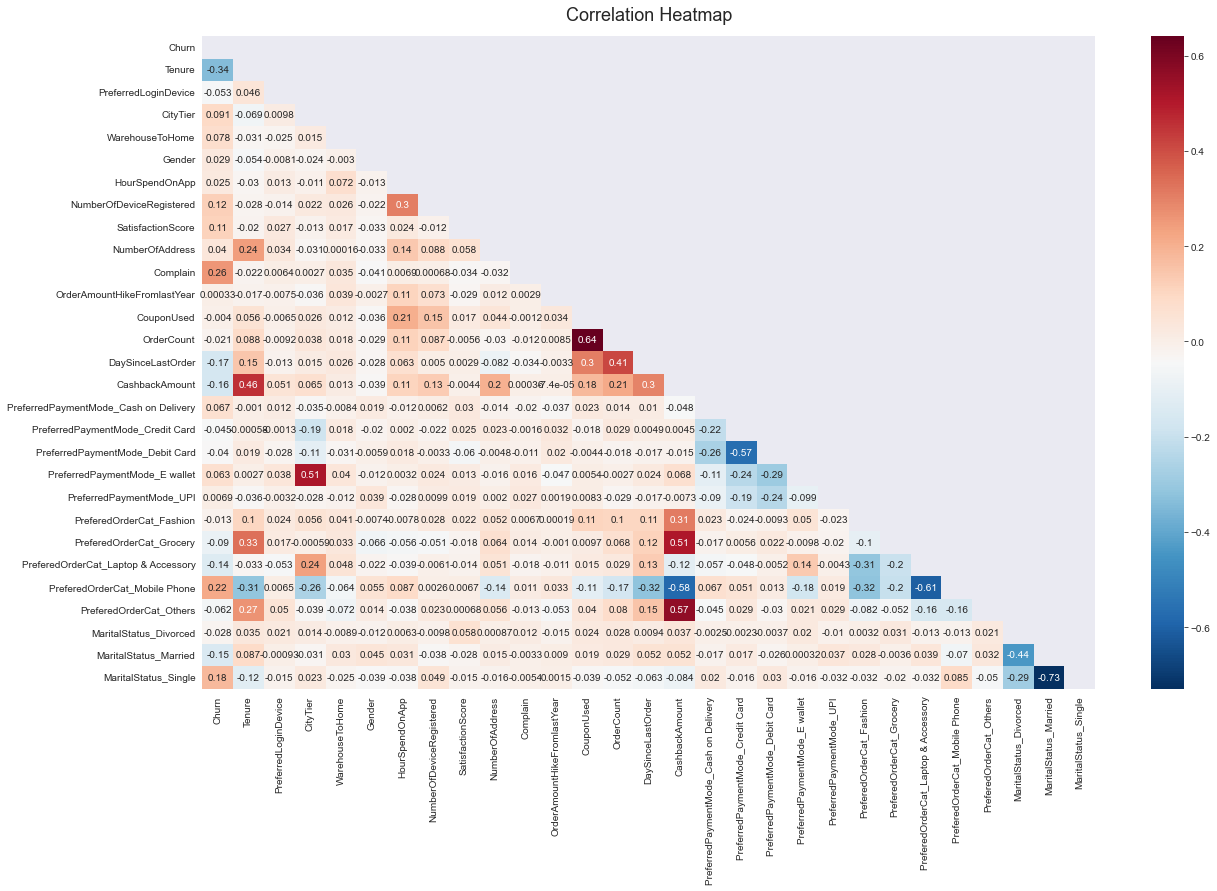

In [79]:
plt.figure(figsize=(20, 12))
mask = np.triu(np.ones_like(df9.corr(), dtype=np.bool))
heatmap = sns.heatmap(df9.corr(), mask=mask, annot=True, cmap='RdBu_r' )
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

`OrderCount` and `MaritalStatus_Married` features will be dropped due to redundancy

## Model Building

### Import Library

In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score
from sklearn.model_selection import cross_validate
from sklearn import tree
from sklearn.metrics import classification_report

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
import catboost as cb

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, y_train)

        # evaluation on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # evaluation on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

In [87]:
from sklearn.metrics import roc_curve, auc
def get_metrics(y_pred, y_act, model_name):
    recall =  recall_score(y_act, y_pred)
    precision = precision_score(y_act, y_pred)
    roc_auc = roc_auc_score(y_act, y_pred)
    f1 = f1_score(y_act, y_pred)
    accuracy = balanced_accuracy_score(y_act, y_pred)

    metrics_result = dict(model_name=model_name, 
                        recall=recall, 
                        precision=precision, 
                        roc_auc=roc_auc, 
                        f1=f1,
                        accuracy=accuracy)
    return metrics_result


def prediction(X_train, y_train, X_test, y_test, clf, model_name='decision tree'):
  
    clf = clf
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)


    result = dict()
    test_result = get_metrics(y_pred=y_test_pred, y_act=y_test, model_name=model_name)
    train_result = get_metrics(y_pred=y_train_pred, y_act=y_train, model_name=model_name)

    result['test'] = test_result
    result['train'] = train_result
    result['y_test'] = y_test
    result['y_test_pred'] = y_test_pred
    result['y_train'] = y_train
    result['y_train_pred'] = y_train_pred
    result['clf'] = clf
    result['X_train'] = X_train
    result['X_test'] = X_test

    del clf

    return result
  
def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

### Split the Train and Test Data

In [84]:
df10 = df9.copy()

In [85]:
X = df10.drop(columns=['OrderCount','MaritalStatus_Married', 'Churn'])
y = df10['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Prediction

In [88]:
model_1_result = prediction(X_train, y_train, X_test, y_test, LogisticRegression(), model_name='logistic regression')
model_2_result = prediction(X_train, y_train, X_test, y_test, RandomForestClassifier(random_state=42), model_name='random forest')
model_3_result = prediction(X_train, y_train, X_test, y_test, KNeighborsClassifier(), model_name='kNN')
model_4_result = prediction(X_train, y_train, X_test, y_test, tree.DecisionTreeClassifier(), model_name='decision tree')
model_5_result = prediction(X_train, y_train, X_test, y_test, AdaBoostClassifier(random_state=42), model_name='adaboost')
model_6_result = prediction(X_train, y_train, X_test, y_test, xgb.XGBClassifier(random_state=42), model_name='xgboost')
model_7_result = prediction(X_train, y_train, X_test, y_test, cb.CatBoostClassifier(random_state=42, logging_level='Silent'), model_name='catboost')

In [89]:
df_train = pd.DataFrame([model_1_result['train'],
              model_2_result['train'], 
              model_3_result['train'], 
              model_4_result['train'], 
              model_5_result['train'],
              model_6_result['train'],
              model_7_result['train']])
df_test = pd.DataFrame([model_1_result['test'], 
              model_2_result['test'], 
              model_3_result['test'], 
              model_4_result['test'], 
              model_5_result['test'],
              model_6_result['test'], 
              model_7_result['test']])

df_traintest = pd.concat([df_train,df_test], axis=1)
df_traintest

model_name    recall  precision   roc_auc        f1  accuracy  \
0  logistic regression  0.506757   0.792812  0.739537  0.618302  0.739537   
1        random forest  1.000000   1.000000  1.000000  1.000000  1.000000   
2                  kNN  0.839189   0.938066  0.913804  0.885877  0.913804   
3        decision tree  1.000000   1.000000  1.000000  1.000000  1.000000   
4             adaboost  0.597297   0.763385  0.779298  0.670205  0.779298   
5              xgboost  1.000000   1.000000  1.000000  1.000000  1.000000   
6             catboost  0.971622   0.998611  0.985670  0.984932  0.985670   

            model_name    recall  precision   roc_auc        f1  accuracy  
0  logistic regression  0.523256   0.743802  0.744367  0.614334  0.744367  
1        random forest  0.877907   0.986928  0.937840  0.929231  0.937840  
2                  kNN  0.639535   0.738255  0.798053  0.685358  0.798053  
3        decision tree  0.895349   0.922156  0.940436  0.908555  0.940436  
4             adaboost  0.598837   0.720280  0.777147  0.653968  0.777147  
5              xgboost  0.924419   0.957831  0.958312  0.940828  0.958312  
6             catboost  0.825581   0.953020  0.908893  0.884735  0.908893

#### Analysis of model prediction results
This prediction model will prioritize the **recall** score with the aim of detecting as many as possible **False Negative** or customers who are **actual churn**
<br/>
Referring to the table above, it can be seen that the model that has the highest recall score is the **XGBoost** model with a recall score of 0.92.

### Hyperparameter Tuning

#### Hyperparameter Logistic Regression

In [133]:
logres = LogisticRegression()
logres.fit(X_train, y_train)
print('Train score: ' + str(logres.score(X_train, y_train)))
print('Test score:' + str(logres.score(X_test, y_test)))

Train score: 0.891822429906542
Test score:0.8943925233644859


In [134]:
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression(random_state=42)
model1 = RandomizedSearchCV(logreg, hyperparameters, cv=5,random_state=42, scoring='recall')
best_model = model1.fit(X_train, y_train)
logres_hyper = prediction(X_train, y_train, X_test, y_test, model, model_name='logistic regression_hyperparam')

In [135]:
print('Best algorithm:', logres_tuned.best_estimator_.get_params()['penalty'])
print('Best C:', logres_tuned.best_estimator_.get_params()['C'])

Best algorithm: l2
Best C: 0.0001


In [136]:
print('Train score: ' + str(logres_tuned.score(X_train, y_train))) #recall
print('Test score: ' + str(logres_tuned.score(X_test, y_test))) #recall

Train score: 0.0
Test score: 0.0


#### Hyperparameter Random Forest

In [96]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
print('Train score: ' + str(rf.score(X_train, y_train))) #recall
print('Test score: ' + str(rf.score(X_test, y_test))) #recall

Train score: 1.0
Test score: 0.9785046728971962


In [97]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
                       bootstrap = [True],
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)],
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], 
                       max_features = ['auto', 'sqrt', 'log2'],
                       n_jobs = [-1],
                      )

rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='recall')

rf_hyper = prediction(X_train, y_train, X_test, y_test, rf_tuned, model_name='random forest_hyperparam')

In [98]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

Best n_estimators: 400
Best bootstrap: True
Best criterion: gini
Best max_depth: 110
Best min_samples_split: 4
Best min_samples_leaf: 1
Best max_features: log2
Best n_jobs: -1


In [99]:
print('Train score: ' + str(rf_tuned.score(X_train, y_train))) #recall
print('Test score: ' + str(rf_tuned.score(X_test, y_test))) #recall

Train score: 0.9932432432432432
Test score: 0.8372093023255814


#### Hyperparameter kNN

In [100]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Train score: ' + str(knn.score(X_train, y_train))) #recall
print('Test score:' + str(knn.score(X_test, y_test))) #recall

Train score: 0.9626168224299065
Test score:0.905607476635514


In [101]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knn = KNeighborsClassifier()
knn_tuned = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=42, scoring='recall')

kkn_hyper = prediction(X_train, y_train, X_test, y_test, knn_tuned, model_name='kNN_hyperparam')

In [102]:
print('Best n_neighbors:', knn_tuned.best_estimator_.get_params()['n_neighbors'])
print('Best p:', knn_tuned.best_estimator_.get_params()['p'])
print('Best algorithm:', knn_tuned.best_estimator_.get_params()['algorithm'])

Best n_neighbors: 5
Best p: 1
Best algorithm: ball_tree


In [103]:
print('Train score: ' + str(knn_tuned.score(X_train, y_train))) #recall
print('Test score: ' + str(knn_tuned.score(X_test, y_test))) #recall

Train score: 0.9121621621621622
Test score: 0.7325581395348837


#### Hyperparameter Decision Tree

In [138]:
dt = tree.DecisionTreeClassifier() 
dt.fit(X_train,y_train)
print('Train score: ' + str(dt.score(X_train, y_train))) #recall
print('Test score:' + str(dt.score(X_test, y_test))) #recall

Train score: 1.0
Test score:0.9710280373831776


In [111]:
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)]
min_samples_split = [2, 5, 10, 100]
min_samples_leaf = [1, 2, 4, 10, 20, 50]
max_features = ['auto', 'sqrt']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

dt = tree.DecisionTreeClassifier()
dt_tuned = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='recall')

dt_hyper = prediction(X_train, y_train, X_test, y_test, dt_tuned, model_name='decision tree_hyperparam')

In [112]:
print('Best max_depth:', dt_tuned.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', dt_tuned.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', dt_tuned.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', dt_tuned.best_estimator_.get_params()['max_features'])

Best max_depth: 87
Best min_samples_split: 10
Best min_samples_leaf: 1
Best max_features: sqrt


In [113]:
print('Train score: ' + str(dt_tuned.score(X_train, y_train))) #recall
print('Test score: ' + str(dt_tuned.score(X_test, y_test))) #recall

Train score: 0.8445945945945946
Test score: 0.7616279069767442


#### Hyperparameter AdaBoost

In [115]:
ab = AdaBoostClassifier()
ab.fit(X_train,y_train)
print('Train score: ' + str(ab.score(X_train, y_train))) #recall
print('Test score: ' + str(ab.score(X_test, y_test))) #recall

Train score: 0.8983644859813084
Test score: 0.8981308411214953


In [116]:
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='recall')

ad_hyper = prediction(X_train, y_train, X_test, y_test, ab_tuned, model_name='adaboost_hyperparam')

In [117]:
show_best_hyperparameter(ab_tuned.best_estimator_, hyperparameters)

Best n_estimators: 1700
Best learning_rate: 0.07394736842105264
Best algorithm: SAMME.R


In [118]:
print('Train score: ' + str(ab_tuned.score(X_train, y_train))) #recall
print('Test score: ' + str(ab_tuned.score(X_test, y_test))) #recall

Train score: 0.6067567567567568
Test score: 0.5872093023255814


#### Hyperparameter XGBoost

In [119]:
xg = xgb.XGBClassifier(random_state=42)
xg.fit(X_train, y_train)
print('Train score: ' + str(xg.score(X_train, y_train))) #recall
print('Test score: ' + str(xg.score(X_test, y_test))) #recall

Train score: 1.0
Test score: 0.9813084112149533


In [120]:
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

xg = xgb.XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')

xg_hyper = prediction(X_train, y_train, X_test, y_test, xg_tuned, model_name='xgboost_hyperparam')

In [121]:
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

Best max_depth: 110
Best min_child_weight: 2
Best gamma: 0.5
Best tree_method: hist
Best colsample_bytree: 1.0
Best eta: 0.7777777777777778
Best lambda: 0.2
Best alpha: 0.1


In [122]:
print('Train score: ' + str(xg_tuned.score(X_train, y_train))) #recall
print('Test score: ' + str(xg_tuned.score(X_test, y_test))) #recall

Train score: 0.995945945945946
Test score: 0.877906976744186


#### Hyperparameter CatBoost

In [123]:
cat = cb.CatBoostClassifier(random_state=42, logging_level='Silent')
cat.fit(X_train,y_train)
print('Train score: ' + str(cat.score(X_train, y_train))) #recall
print('Test score: ' + str(cat.score(X_test, y_test))) #recall

Train score: 0.9948598130841122
Test score: 0.9654205607476636


In [124]:
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)]
                      )

cat = cb.CatBoostClassifier(random_state=42,logging_level='Silent')
cat_tuned = RandomizedSearchCV(cat, hyperparameters, random_state=42, cv=5, scoring='recall')

cat_hyper = prediction(X_train, y_train, X_test, y_test, cat_tuned, model_name='cat boost_hyperparam')

In [125]:
show_best_hyperparameter(cat_tuned.best_estimator_, hyperparameters)

Best n_estimators: 1100
Best learning_rate: 0.05310526315789474


In [126]:
print('Train score: ' + str(cat_tuned.score(X_train, y_train))) #recall
print('Test score: ' + str(cat_tuned.score(X_test, y_test))) #recall

Train score: 1.0
Test score: 0.9186046511627907


#### Hyperparameter Result

In [132]:
hy_train = pd.DataFrame([logres_hyper['train'], 
              rf_hyper['train'],
              kkn_hyper['train'], 
              dt_hyper['train'], 
              ad_hyper['train'],
              xg_hyper['train'],
              cat_hyper['train']])
hy_test = pd.DataFrame([logres_hyper['test'], 
              rf_hyper['test'],
              kkn_hyper['test'], 
              dt_hyper['test'], 
              ad_hyper['test'],
              xg_hyper['test'],
              cat_hyper['test']])
hy_traintest = pd.concat([hy_train,hy_test], axis=1)
hy_traintest

model_name    recall  precision   roc_auc        f1  \
0  logistic regression_hyperparam  0.000000   0.000000  0.500000  0.000000   
1        random forest_hyperparam  0.993243   1.000000  0.996622  0.996610   
2                  kNN_hyperparam  0.912162   0.961538  0.952268  0.936200   
3        decision tree_hyperparam  0.844595   0.884017  0.910715  0.863856   
4             adaboost_hyperparam  0.606757   0.787719  0.786288  0.685496   
5              xgboost_hyperparam  0.995946   0.998645  0.997832  0.997294   
6            cat boost_hyperparam  1.000000   1.000000  1.000000  1.000000   

   accuracy                      model_name    recall  precision   roc_auc  \
0  0.500000  logistic regression_hyperparam  0.000000   0.000000  0.500000   
1  0.996622        random forest_hyperparam  0.837209   0.993103  0.918048   
2  0.952268                  kNN_hyperparam  0.732558   0.807692  0.849575   
3  0.910715        decision tree_hyperparam  0.761628   0.744318  0.855758   
4  0.786288             adaboost_hyperparam  0.587209   0.737226  0.773560   
5  0.997832              xgboost_hyperparam  0.877907   0.967949  0.936170   
6  1.000000            cat boost_hyperparam  0.918605   0.969325  0.956518   

         f1  accuracy  
0  0.000000  0.500000  
1  0.908517  0.918048  
2  0.768293  0.849575  
3  0.752874  0.855758  
4  0.653722  0.773560  
5  0.920732  0.936170  
6  0.943284  0.956518

#### Analysis of hyperparameter results
Referring to the table above, it can be seen that the model that has the highest recall score is the **CatBoosts** model with a recall score of 0.91.
<br/>
From the results above, **decision tree modelling before hyperparameter tuning** is the most robust model 

### Confusion Matrix

In [140]:
from sklearn.metrics import confusion_matrix
y_pred = dt.predict(X_test)
y_pred_train = dt.predict(X_train)
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[881  17]
 [ 14 158]]


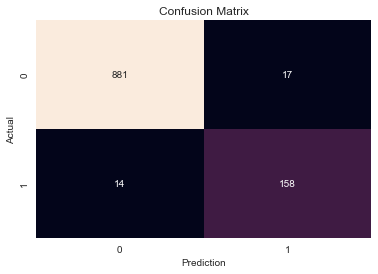

In [141]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cbar=False,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.show()

## Feature Important

In [142]:
import shap

In [143]:
# model interpretation Decision Tree

explainer = shap.Explainer(model_4_result['clf'].predict, model_4_result['X_test'])
shap_values_dt = explainer(model_4_result['X_test'])

Permutation explainer: 1071it [01:43, 10.37it/s]                          


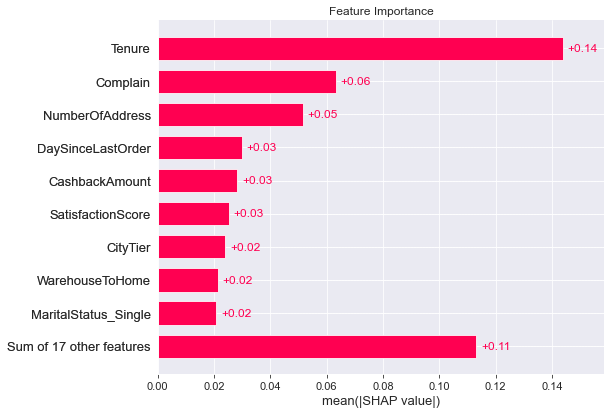

In [149]:
plt.title("Feature Importance")
plt.gray()
shap.plots.bar(shap_values_dt,show = False)

plt.show()

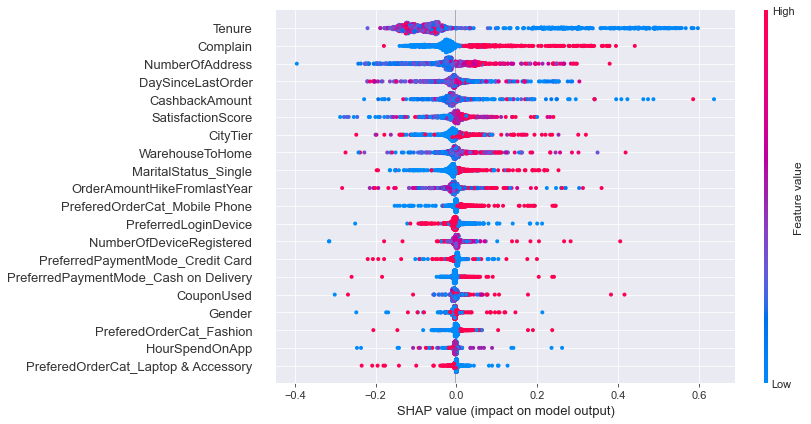

In [146]:
shap.summary_plot(shap_values_dt, plot_type='dot', plot_size=(12, 6))

### Top Feature Insight

In [6]:
df_fi = df.copy()
df_fi.sample(5)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
4266       54267      0    24.0             Computer         1   
3125       53126      1     1.0         Mobile Phone         1   
4889       54890      0     9.0         Mobile Phone         1   
2038       52039      1     0.0         Mobile Phone         3   
353        50354      0     NaN                Phone         3   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
4266              7.0           Debit Card  Female             4.0   
3125             22.0          Credit Card    Male             3.0   
4889             32.0          Credit Card  Female             3.0   
2038              9.0           Debit Card    Male             2.0   
353              19.0                   CC    Male             2.0   

      NumberOfDeviceRegistered PreferedOrderCat  SatisfactionScore  \
4266                         4           Others                  4   
3125                         4          Fashion                  3   
4889                         4          Fashion                  3   
2038                         4          Fashion                  1   
353                          3           Mobile                  3   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
4266       Married                5         1                          NaN   
3125      Divorced                9         1                         13.0   
4889       Married                3         1                         12.0   
2038       Married                2         1                         11.0   
353       Divorced                2         0                         11.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
4266         1.0         2.0                8.0          306.72  
3125         NaN         8.0                8.0          261.10  
4889         1.0        11.0                NaN          228.88  
2038         3.0         3.0                7.0          203.25  
353          1.0         1.0                6.0          120.96

In [7]:
df_fi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

#### Customer with Shorter Tenure tends to Churn

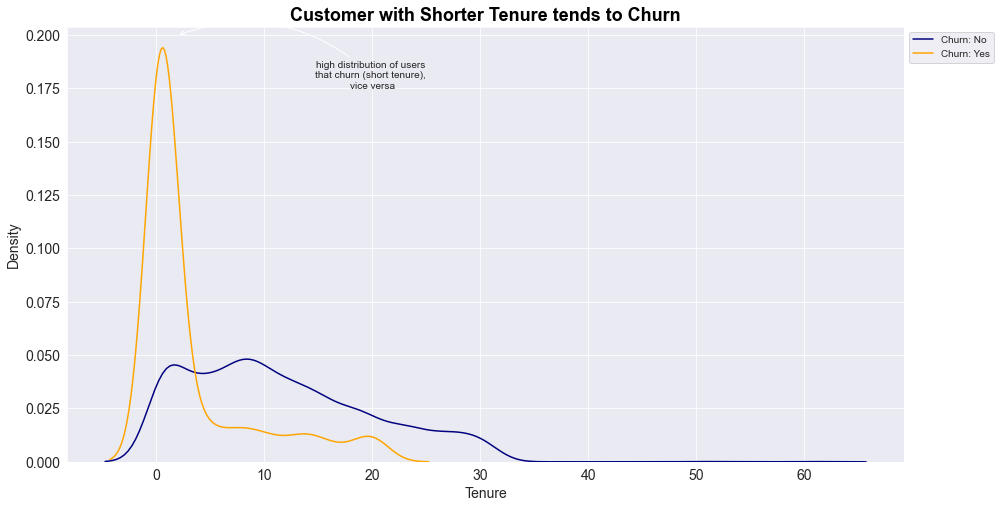

In [20]:
fig, ax = plt.subplots(figsize=(15, 8))

sns.kdeplot(df_fi[df_fi['Churn'] == 0]['Tenure'].dropna(), color= 'navy', label= 'Churn: No', ax=ax)
sns.kdeplot(df_fi[df_fi['Churn'] == 1]['Tenure'].dropna(), color= 'orange', label= 'Churn: Yes', ax=ax)

ax.set_title('Customer with Shorter Tenure tends to Churn',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14)
ax.set_xlabel('Tenure', fontsize=14)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1)

ax.annotate('high distribution of users \nthat churn (short tenure), \nvice versa', 
            xy=(2, 0.2), xytext=(20, 0.175),
            arrowprops=dict(facecolor='black',arrowstyle="->",
                            connectionstyle="arc3,rad=.3"),ha='center');

#### Churn by Tenure

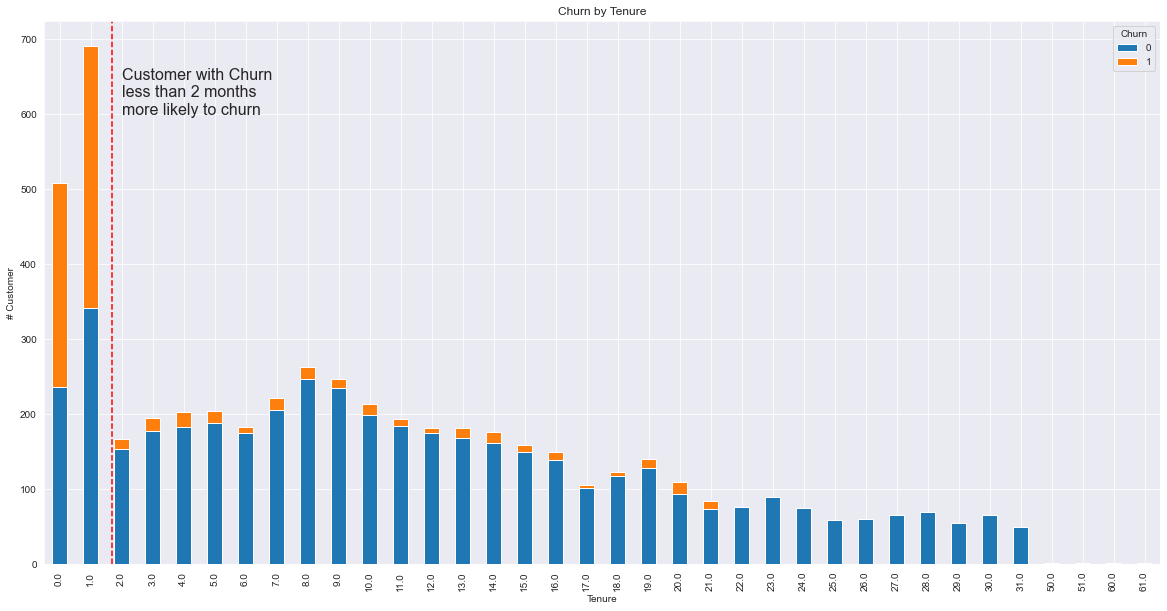

In [31]:
Tenure = pd.crosstab(df_fi["Tenure"], df_fi["Churn"])
sns.set_style('darkgrid')
Tenure.plot(kind = 'bar', stacked = 'true', title = "Churn by Tenure",figsize=(20,10))

plt.axvline(1.7, linestyle='--', color='r')
plt.text
plt.xlabel('Tenure')
plt.ylabel('# Customer')
plt.text(2, 600, s='Customer with Churn \nless than 2 months \nmore likely to churn', fontsize=16)
plt.show()

#### Churn by Complain

In [10]:
group_by_complain = df_fi.groupby(['Churn','Complain']).agg({'CustomerID':'nunique'}).reset_index()
group_by_complain['Complain'] = group_by_complain['Complain'].replace({1:'Complain',
                                                                0:'Not Complain'})
group_by_complain

Churn      Complain  CustomerID
0      0  Not Complain        3586
1      0      Complain        1096
2      1  Not Complain         440
3      1      Complain         508

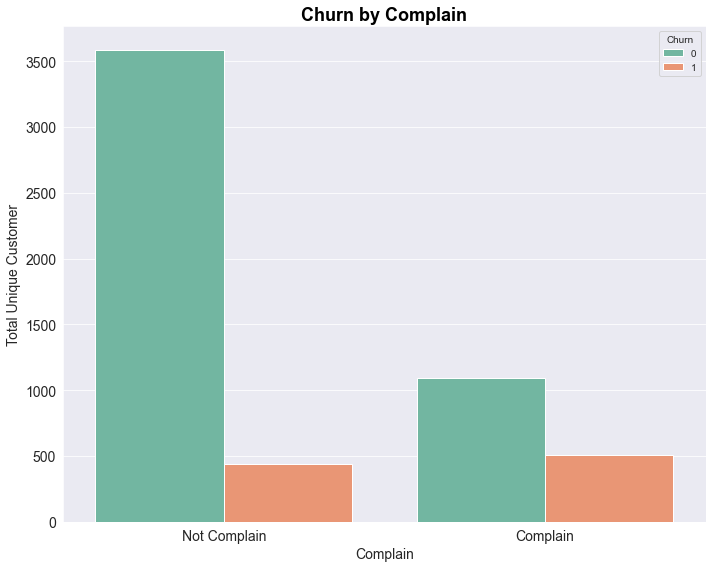

In [16]:
plt.figure(figsize=(10,8))
sns.barplot(y='CustomerID', x='Complain', hue='Churn', data=group_by_complain,palette = 'Set2')
sns.set_style('darkgrid')

plt.title("Churn by Complain",color='black',fontsize=18,fontweight='bold')
plt.ylabel('Total Unique Customer', fontsize=14) # y axis label
plt.xlabel('Complain', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.tight_layout()

#### Churn by NumberOfAddress

In [26]:
group_by_NumberofAddress = df_fi.groupby(['Churn','NumberOfAddress']).agg({'CustomerID':'nunique'}).reset_index()
group_by_NumberofAddress

Churn  NumberOfAddress  CustomerID
0       0                1         326
1       0                2        1128
2       0                3        1050
3       0                4         523
4       0                5         504
5       0                6         316
6       0                7         192
7       0                8         214
8       0                9         193
9       0               10         159
10      0               11          75
11      0               21           1
12      0               22           1
13      1                1          45
14      1                2         241
15      1                3         228
16      1                4          65
17      1                5          67
18      1                6          66
19      1                7          64
20      1                8          66
21      1                9          46
22      1               10          35
23      1               11          23
24      1               19           1
25      1               20           1

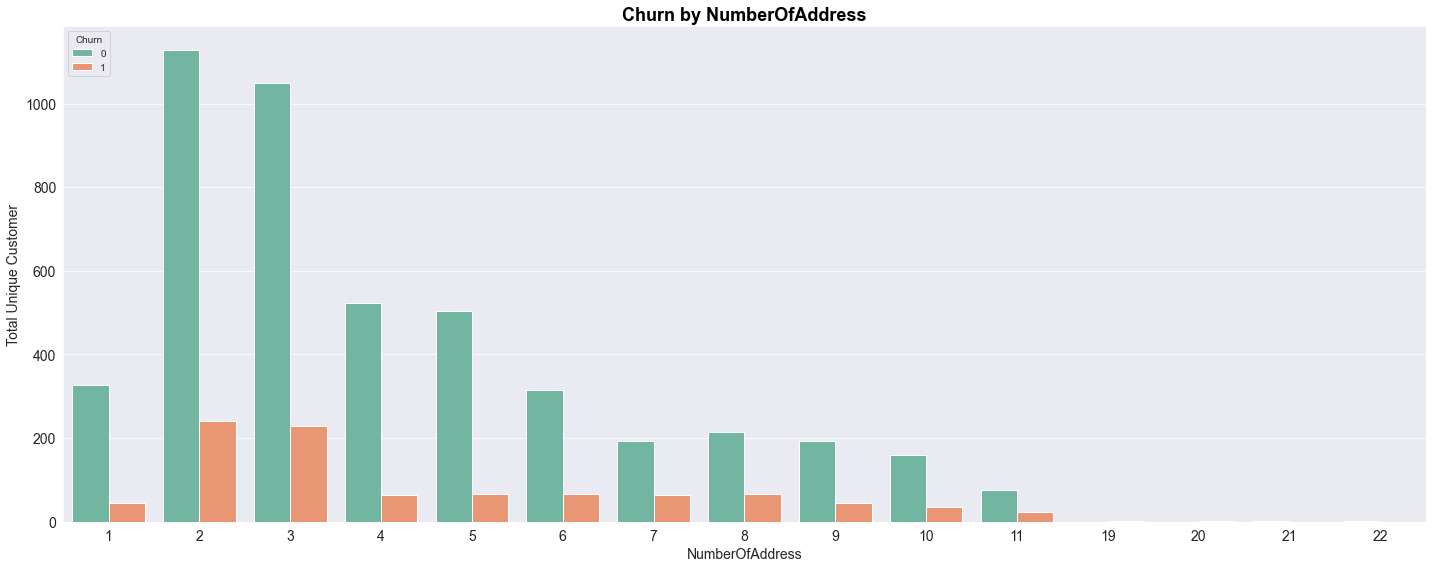

In [29]:
plt.figure(figsize=(20,8))
sns.barplot(y='CustomerID', x='NumberOfAddress', hue='Churn', data=group_by_NumberofAddress, palette = 'Set2')
plt.title("Churn by NumberOfAddress",color='black',fontsize=18,fontweight='bold')
plt.ylabel('Total Unique Customer', fontsize=14)
plt.xlabel('NumberOfAddress', fontsize=14)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.tight_layout()